In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv("checkpoint3.csv")

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          8358 non-null   object
 1   v2          8336 non-null   object
 2   Unnamed: 2  83 non-null     object
 3   Unnamed: 3  22 non-null     object
 4   Unnamed: 4  9 non-null      object
dtypes: object(5)
memory usage: 326.6+ KB


In [10]:
dt.columns=['spam','text','v1','v2','v3']

dt=dt.dropna(subset=['text'])
dt['text'] = dt['text'].astype(str) + ' ' + dt['v1'].astype(str) + ' ' + dt['v2'].astype(str) + ' ' + dt['v3'].astype(str)


d = dt[['spam', 'text']]

d.head(5)

,spam,text
11,ham,"I wake up long ago already... Dunno, what othe..."
12,ham,K...k...when will you give treat? nan nan nan
13,spam,Think ur smart ? Win å£200 this week in our we...
14,spam,URGENT! We are trying to contact U. Todays dra...
15,spam,PRIVATE! Your 2003 Account Statement for 07808...


In [11]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

dt_train, dt_test = train_test_split(dt, test_size=0.3, random_state=42)

vetorizador = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9
)

X1_train = vetorizador.fit_transform(dt_train['text'])  
y1_train = dt_train['spam']

X1_test = vetorizador.transform(dt_test['text'])        
y1_test = dt_test['spam']

modelo = MultinomialNB()
modelo.fit(X1_train, y1_train)

MultinomialNB()

In [12]:
y1_pred = modelo.predict(X1_test)

print(dt['spam'].value_counts())

spam
ham     7212
spam    1124
Name: count, dtype: int64


Acurácia: 0.9856057576969213
F1 Score: 0.9454545454545454


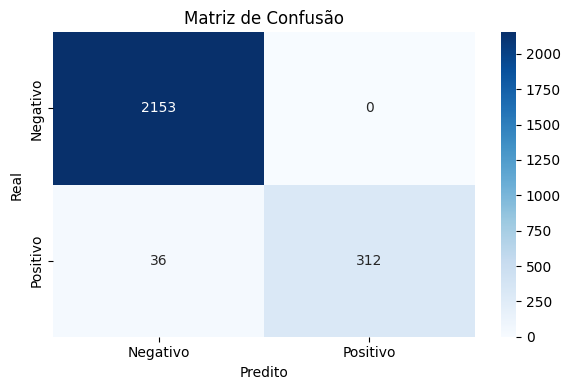

In [13]:
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt

print("Acurácia:", accuracy_score(y1_test, y1_pred))
print("F1 Score:", f1_score(y1_test, y1_pred, pos_label='spam'))

# Matriz de confusão
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

spam
ham     7212
spam    1124
Name: count, dtype: int64
Acurácia: 0.9780087964814075
F1 Score: 0.9141965678627145


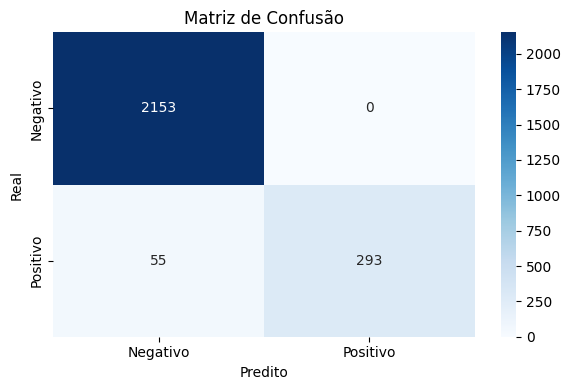

In [14]:
vetorizador1 = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.99
)

X2_train = vetorizador1.fit_transform(dt_train['text'])  
y2_train = dt_train['spam']

X2_test = vetorizador1.transform(dt_test['text'])        
y2_test = dt_test['spam']

modelo2 = MultinomialNB()
modelo2.fit(X2_train, y2_train)

y2_pred = modelo2.predict(X2_test)

print(dt['spam'].value_counts())


from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt

print("Acurácia:", accuracy_score(y2_test, y2_pred))
print("F1 Score:", f1_score(y2_test, y2_pred, pos_label='spam'))

# Matriz de confusão
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show() # o modelo 1 se mostrou melhor que o 2 logo ele foi o escolhido

In [15]:
import pickle


with open('modelo.pkl', 'wb') as f_model:
    pickle.dump(modelo, f_model)


with open('vetorizador.pkl', 'wb') as f_vec:
    pickle.dump(vetorizador, f_vec)